In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
dataTF =pd.read_excel(open('analysistest.xlsx', 'rb'), sheet_name='tensorflow privacy')  
dataTF.columns =[column.replace(" ", "_") for column in dataTF.columns]
dataTF.head(1)

,exp_No,dataset,optimizer,mode,epochs,l2_norm_clip,batch_and_microbatch,noise_multiplier,learning_rate,epsilon,accuracy(With_DP),accuracy(Without_DP),Drop_in_accuracy(%),accuracy_to_epsilon,Unnamed:_14
0,1,MNIST,DPGradientDescentGaussianOptimizer,NoiseMultiplier,20,1.0,250,1.1,0.15,1.76,0.9429,0.9965,5.36,0.566,NaN


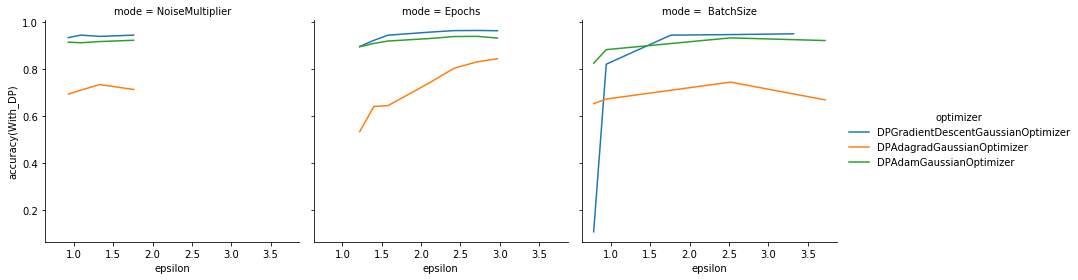

In [54]:
#data1 = data[(data.mode == "Default") & (data.mode == "L2_norm_clip")]
data1 = dataTF.query('mode != "Default" and mode != "L2_norm_clip" and mode != "LearningRate"')
g = sns.FacetGrid(data=data1, col="mode",hue="optimizer",col_wrap=3, height=4)
g.map(sns.lineplot,"epsilon","accuracy(With_DP)")
g.add_legend()

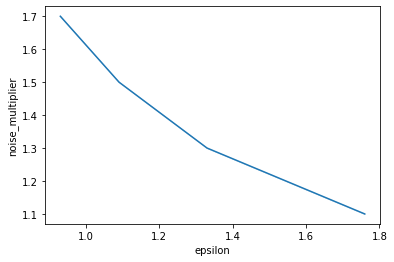

In [42]:
data2 = dataTF.query(' mode == "NoiseMultiplier" or mode == "Default"')

sns.lineplot(x="epsilon",y="noise_multiplier", data=data2)

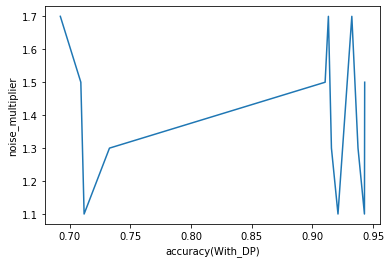

In [51]:
data2 = dataTF.query(' mode == "NoiseMultiplier" or mode == "Default"')

sns.lineplot(x="accuracy(With_DP)",y="noise_multiplier", data=data2)

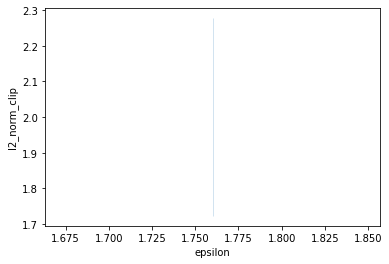

In [49]:
data2 = dataTF.query(' mode == "L2_norm_clip" or mode == "Default"')

sns.lineplot(x="epsilon",y="l2_norm_clip", data=data2)

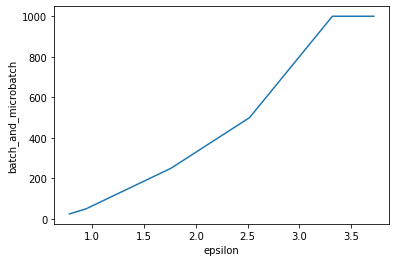

In [50]:
data2 = dataTF.query(' mode == " BatchSize"  or mode == "Default"')

sns.lineplot(x="epsilon",y="batch_and_microbatch", data=data2)

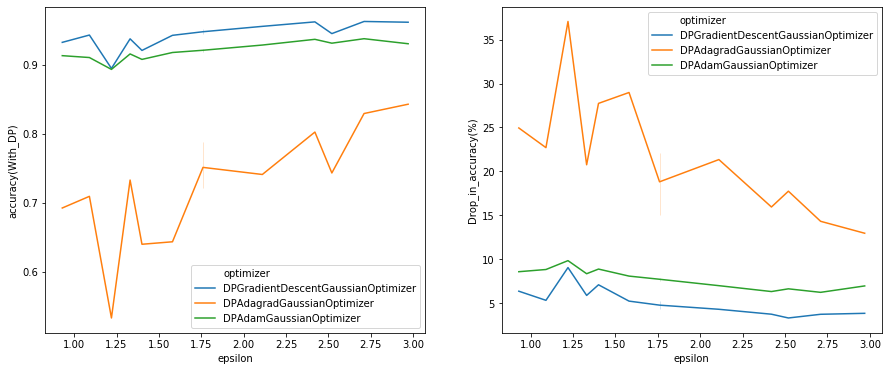

In [67]:
data1 = dataTF.query(' mode != "LearningRate" and batch_and_microbatch > 50 and batch_and_microbatch < 1000')
fig, axs = plt.subplots(ncols=2,figsize=(15, 6))
#plt.figure(figsize=(20,50))

sns.lineplot(x="epsilon", y="accuracy(With_DP)",  data=data1, hue="optimizer",ax=axs[0]);
#sns.lineplot(x="epsilon", y="accuracy(With_DP)",  data=data1,ax=axs[1])
sns.lineplot(x="epsilon", y="Drop_in_accuracy(%)",hue="optimizer",  data=data1,ax=axs[1])
#plt.savefig('save_as_a_png.png')

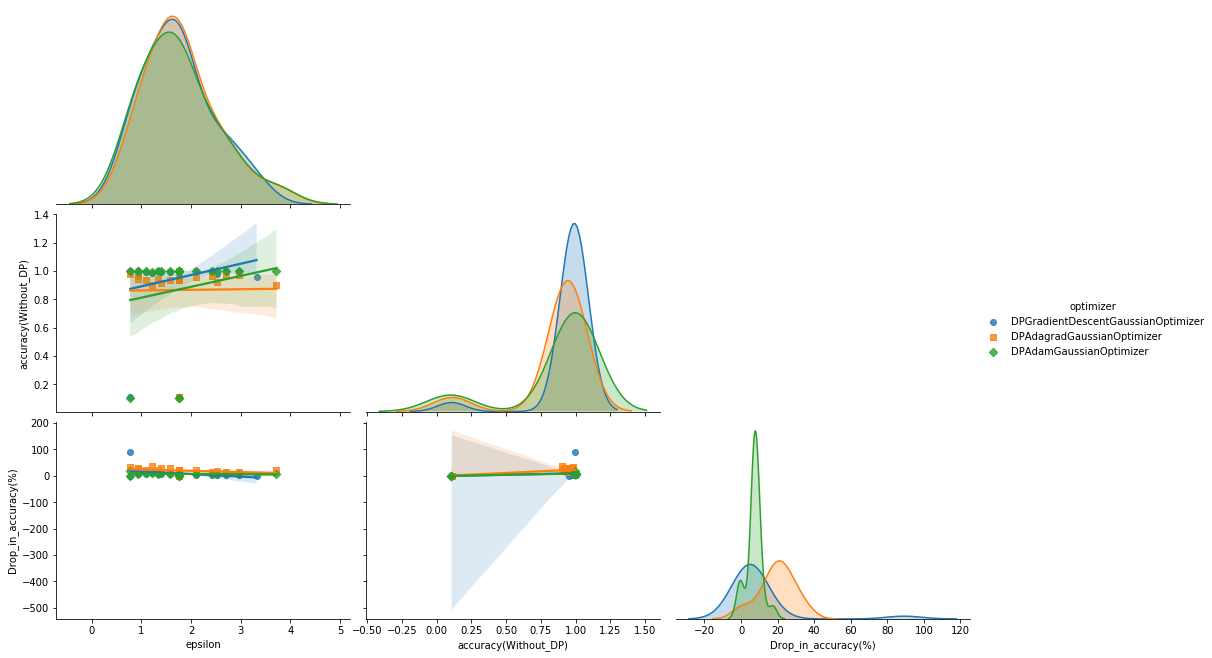

In [8]:
#data4 = data.drop(['epsilon','accuracy(Without DP)','accuracy to epsilon','Drop in accuracy(%)','noise multiplier','mode','optimizer','dataset','l2_norm_clip','learning rate','epochs','exp No','batch and microbatch'], axis=1)
gg=sns.pairplot(dataTF,
                hue='optimizer',
                vars=["epsilon", "accuracy(Without_DP)","Drop_in_accuracy(%)"],
                markers=["o", "s", "D"],
                height=3,
               corner=True,
                aspect=1.5,
               kind="reg")

In [33]:
dataTF.head(1)

,exp_No,dataset,optimizer,mode,epochs,l2_norm_clip,BatchSize,noise_multiplier,learning_rate,epsilon,accuracy(With_DP),accuracy(Without_DP),Drop_in_accuracy(%),accuracy_to_epsilon
0,1,MNIST,DPGradientDescentGaussianOptimizer,Default,20,1.0,250,1.1,0.15,1.76,0.9429,0.9965,5.36,0.566


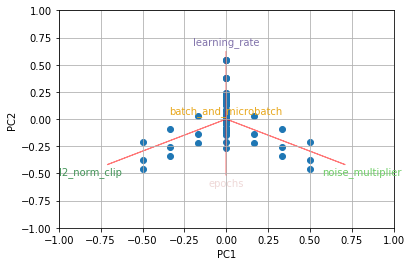

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

xcols = ['epochs','batch_and_microbatch','l2_norm_clip','noise_multiplier','learning_rate']
print()
ycols = ['epsilon','accuracy(With_DP)','accuracy(Without_DP)','Drop_in_accuracy(%)','accuracy_to_epsilon']
X = dataTF[ xcols]
# Separating out the target
y = dataTF[ycols]

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15,str(xcols[i]),color = np.random.rand(3,),  ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i],color = np.random.rand(3,), ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

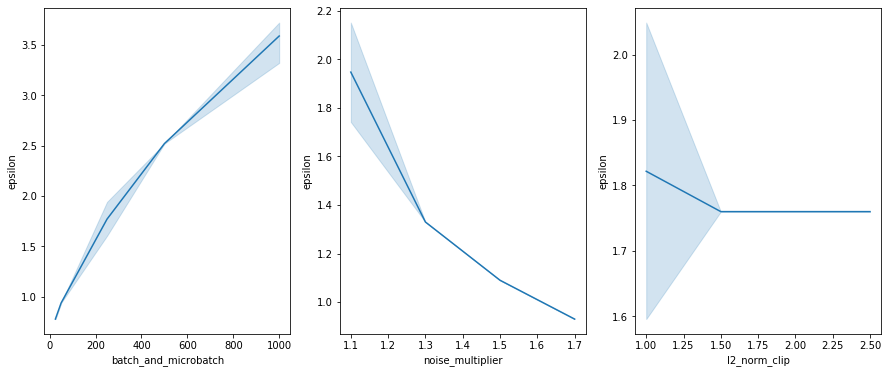

In [70]:
data1 = dataTF.query(' mode != "LearningRate" ')
fig, axs = plt.subplots(ncols=3,figsize=(15, 6))
#plt.figure(figsize=(20,50))

sns.lineplot(y="epsilon", x="batch_and_microbatch",  data=data1,ax=axs[0]);
sns.lineplot(y="epsilon", x="noise_multiplier",  data=data1,ax=axs[1])
sns.lineplot(y="epsilon", x="l2_norm_clip",  data=data1,ax=axs[2])
#plt.savefig('save_as_a_png.png')

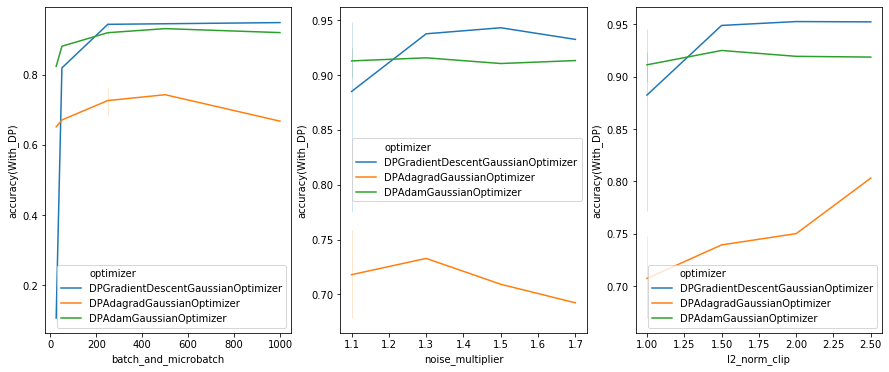

In [69]:

data1 = dataTF.query(' mode != "LearningRate"  ')
fig, axs = plt.subplots(ncols=3,figsize=(15, 6))
#plt.figure(figsize=(20,50))

sns.lineplot(y="accuracy(With_DP)", x="batch_and_microbatch",  data=data1,ax=axs[0],hue="optimizer");
sns.lineplot(y="accuracy(With_DP)", x="noise_multiplier",  data=data1,ax=axs[1],hue="optimizer")
sns.lineplot(y="accuracy(With_DP)", x="l2_norm_clip",  data=data1,ax=axs[2],hue="optimizer")
#plt.savefig('save_as_a_png.png')